In [1]:
import skimage
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data
from skimage.color import label2rgb

In [2]:
def overlay_labels(image, lbp, labels):
  mask = np.logical_or.reduce([lbp == each for each in labels])
  return label2rgb(mask, image = image, bg_label = 0, alpha = 0.5)

def highlight_bars(bars, indexes):
  for i in indexes:
    bars[i].set_facecolor('r')

def hist(ax, lbp):
  n_bins = int(lbp.max() + 1)
  return ax.hist(lbp.ravel(), density = True, bins = n_bins, range = (0, n_bins),
                 facecolor = '0.5')

In [3]:
image = data.brick()
radius = 3
n_points = 8 * radius
METHOD = 'uniform'

In [4]:
lbp = local_binary_pattern(image, n_points, radius, METHOD)

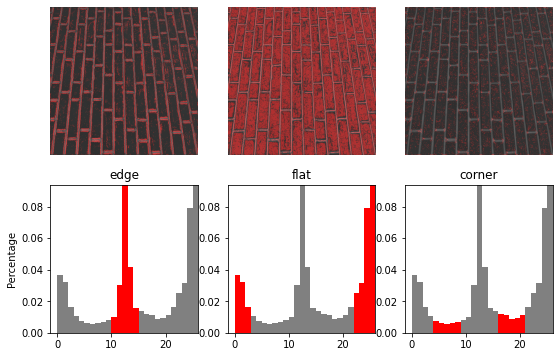

In [5]:
fig, (ax_img, ax_hist) = plt.subplots(nrows = 2, ncols = 3, figsize = (9, 6))
plt.gray()

titles = ('edge', 'flat', 'corner')
w = width = radius - 1
edge_labels = range(n_points // 2 - w, n_points // 2 + w + 1)
flat_labels = list(range(0, w + 1)) + list(range(n_points - w, n_points + 2))
i_14 = n_points // 4
i_34 = 3 * (n_points // 4)
corner_labels = (list(range(i_14 - w, i_14 + w + 1)) +
                 list(range(i_34 - w, i_34 + w + 1)))

label_sets = (edge_labels, flat_labels, corner_labels)

for ax, labels in zip(ax_img, label_sets):
  ax.imshow(overlay_labels(image, lbp, labels))

for ax, labels, name in zip(ax_hist, label_sets, titles):
  counts, _, bars = hist(ax, lbp)
  highlight_bars(bars, labels)
  ax.set_ylim(top = np.max(counts[:-1]))
  ax.set_xlim(right = n_points + 2)
  ax.set_title(name)

ax_hist[0].set_ylabel('Percentage')
for ax in ax_img:
  ax.axis('off')

In [6]:
radius = 2
n_points = 8 * radius

In [7]:
def kullback_leibler_divergence(p, q):
  p = np.asarray(p)
  q = np.asarray(q)
  filt = np.logical_and(p != 0, q != 0)
  return np.sum(p[filt] * np.log2(p[filt] / q[filt]))

def match(refs, img):
  best_score = 10
  best_name = None
  lbp = local_binary_pattern(img, n_points, radius, METHOD)
  n_bins = int(lbp.max() + 1)
  hist, _ = np.histogram(lbp, density = True, bins = n_bins, range = (0, n_bins))
  for name, ref in refs.items():
    ref_hist, _ = np.histogram(ref, density = True, bins = n_bins,
                               range = (0, n_bins))
    score = kullback_leibler_divergence(hist, ref_hist)
    if score < best_score:
      best_score = score
      best_name = name
    return best_name

In [8]:
brick = data.brick()
grass = data.grass()
gravel = data.gravel()

refs = { 
    'brick': local_binary_pattern(brick, n_points, radius, METHOD),
    'grass': local_binary_pattern(grass, n_points, radius, METHOD),
    'gravel': local_binary_pattern(gravel, n_points, radius, METHOD)
}

In [9]:
print('Rotated images matched against references using LBP:')
print('original: brick, rotated: 30deg, match result: ',
      match(refs, rotate(brick, angle = 30, resize = False)))
print('original: grass, rotated: 70deg, match result: ',
      match(refs, rotate(grass, angle = 70, resize = False)))
print('original: gravel, rotated: 145deg, match result: ',
      match(refs, rotate(gravel, angle = 145, resize = False)))

Rotated images matched against references using LBP:
original: brick, rotated: 30deg, match result:  brick
original: grass, rotated: 70deg, match result:  brick
original: gravel, rotated: 145deg, match result:  brick


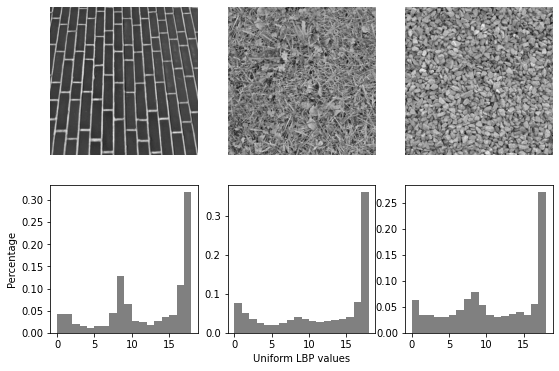

In [10]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3, figsize = (9, 6))

plt.gray()

ax1.imshow(brick)
ax1.axis('off')
hist(ax4, refs['brick'])
ax4.set_ylabel('Percentage')

ax2.imshow(grass)
ax2.axis('off')
hist(ax5, refs['grass'])
ax5.set_xlabel('Uniform LBP values')

ax3.imshow(gravel)
ax3.axis('off')
hist(ax6, refs['gravel'])

plt.show()

##Your Turn

In [11]:
import cv2

In [12]:
brick = cv2.imread(r'/content/drive/MyDrive/GIS 5050/Lab 6/ClassicRedBrick.jpg')
brick = cv2.cvtColor(brick, cv2.COLOR_BGR2GRAY)
grass = cv2.imread(r'/content/drive/MyDrive/GIS 5050/Lab 6/grass.jpg')
grass = cv2.cvtColor(grass, cv2.COLOR_BGR2GRAY)
gravel = cv2.imread(r'/content/drive/MyDrive/GIS 5050/Lab 6/gravel.jpg')
gravel = cv2.cvtColor(gravel, cv2.COLOR_BGR2GRAY)

refs = { 
    'brick': local_binary_pattern(brick, n_points, radius, METHOD),
    'grass': local_binary_pattern(grass, n_points, radius, METHOD),
    'gravel': local_binary_pattern(gravel, n_points, radius, METHOD)
}

In [13]:
print('Rotated images matched against references using LBP:')
print('original: brick, rotated: 30deg, match result: ',
      match(refs, rotate(brick, angle = 30, resize = False)))
print('original: grass, rotated: 70deg, match result: ',
      match(refs, rotate(grass, angle = 70, resize = False)))
print('original: gravel, rotated: 145deg, match result: ',
      match(refs, rotate(gravel, angle = 145, resize = False)))

Rotated images matched against references using LBP:
original: brick, rotated: 30deg, match result:  brick
original: grass, rotated: 70deg, match result:  brick
original: gravel, rotated: 145deg, match result:  brick


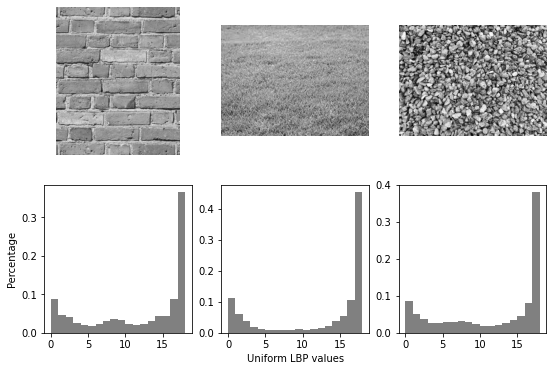

In [14]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3, figsize = (9, 6))

plt.gray()

ax1.imshow(brick)
ax1.axis('off')
hist(ax4, refs['brick'])
ax4.set_ylabel('Percentage')

ax2.imshow(grass)
ax2.axis('off')
hist(ax5, refs['grass'])
ax5.set_xlabel('Uniform LBP values')

ax3.imshow(gravel)
ax3.axis('off')
hist(ax6, refs['gravel'])

plt.show()